In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/mbti_1.csv') 

## Preprocessing

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

### Posts cleaning

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import time

%time data.posts[1].replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
%time re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data.posts[1])


from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Lemmatizer | Stemmatizer
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

# One post
OnePost = data.posts[1]

# List all urls
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', OnePost)

# Remove urls
temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', OnePost)

# Keep only words
temp = re.sub("[^a-zA-Z]", " ", temp)

# Remove spaces > 1
temp = re.sub(' +', ' ', temp).lower()

# Remove stopwords and lematize
%time stemmer.stem(" ".join([w for w in temp.split(' ') if w not in cachedStopWords]))

print("\nBefore preprocessing:\n\n", OnePost[0:500])
print("\nAfter preprocessing:\n\n", temp[0:500])
print("\nList of urls:")
urls

CPU times: user 686 µs, sys: 131 µs, total: 817 µs
Wall time: 10.8 ms
CPU times: user 401 µs, sys: 77 µs, total: 478 µs
Wall time: 482 µs
CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 2.65 ms

Before preprocessing:

 'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + L

After preprocessing:

  i m finding the lack of me in these posts very alarming sex can be boring if it s in the same position often for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary there isn t 

['http://img188.imageshack.us/img188/6422/6020d1f9da6944a6b71bbe6.jpg',
 'http://img.adultdvdtalk.com/813a0c6243814cab84c51',
 'http://i817.photobucket.com/albums/zz96/kamioo/Dirtywinch.png',
 'http://i817.photobucket.com/albums/zz96/kamioo/Thunderstorm.pnghttp://i817.photobucket.com/albums/zz96/kamioo/Thunderstormbw.png',
 'http://i817.photobucket.com/albums/zz96/kamioo/Cosmicstorm.png',
 'http://www.youtube.com/watch?v=j5W73HaVQBg',
 'http://i817.photobucket.com/albums/zz96/kamioo/Deathgrip.png',
 'http://i817.photobucket.com/albums/zz96/kamioo/Deathgripbw.png',
 'http://i817.photobucket.com/albums/zz96/kamioo/Statickitten.png']

### Preprocessing comments


In [ ]:
##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def pre_process_data(data, remove_stop_words=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if i % 500 == 0:
            print("%s | %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        type_labelized = lab_encoder.transform([row[1].type])[0]
        list_personality.append(type_labelized)
        list_posts.append(temp)

    #del data
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality = pre_process_data(data, remove_stop_words=True)

500 | 8675 rows
1000 | 8675 rows
1500 | 8675 rows
2000 | 8675 rows
2500 | 8675 rows
3000 | 8675 rows
3500 | 8675 rows
4000 | 8675 rows
4500 | 8675 rows
5000 | 8675 rows
5500 | 8675 rows
6000 | 8675 rows
6500 | 8675 rows
7000 | 8675 rows
7500 | 8675 rows
8000 | 8675 rows
8500 | 8675 rows


In [ ]:
list_posts

array([' enfp intj moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear enfp favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo entp lady c

## Vectorize with count and tf-idf


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
#                             ngram_range=(1,1),
                             max_df=0.5,
                             min_df=0.1) 
                                 
tfizer = TfidfTransformer()

print("CountVectorizer")
X_cnt = cntizer.fit_transform(list_posts)
print("Tf-idf")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer
Tf-idf


In [ ]:
X_tfidf.shape

(8675, 754)

In [ ]:
list_posts[0]

' enfp intj moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear enfp favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo entp lady complime

### Count the top 50 words of the count vectorizer

In [ ]:
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key

In [ ]:
top_50 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-50:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_50]

['infp',
 'infj',
 'intj',
 'intp',
 'relationship',
 'lol',
 'enfp',
 'yeah',
 'thanks',
 'oh',
 'bit',
 'may',
 'entp',
 'agree',
 'quite',
 'guess',
 'talk',
 'school',
 'great',
 'thank',
 'personality',
 'use',
 'function',
 'bad',
 'everything',
 'interesting',
 'believe',
 'definitely',
 'happy',
 'reason',
 'part',
 'used',
 'often',
 'seem',
 'experience',
 'last',
 'word',
 'anyone',
 'test',
 'keep',
 'hate',
 'another',
 'girl',
 'forum',
 'enough',
 'put',
 'else',
 'care',
 'talking',
 'getting']

### LSA Part

In [ ]:
print(np.around(X_tfidf, 2))
X_tfidf.shape

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.05 0.   ... 0.   0.   0.  ]
 [0.16 0.06 0.14 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.07 0.   ... 0.   0.   0.  ]
 [0.   0.05 0.   ... 0.   0.06 0.  ]]


(8675, 754)

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Truncated SVD
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd_vec = svd.fit_transform(X_tfidf)

In [ ]:
print(np.around(svd_vec, 2))
svd_vec.shape

[[ 0.38 -0.03 -0.02 ... -0.15  0.07 -0.12]
 [ 0.42  0.12 -0.03 ...  0.16  0.19 -0.15]
 [ 0.38 -0.07 -0.07 ... -0.04 -0.04 -0.03]
 ...
 [ 0.39 -0.09 -0.04 ...  0.21 -0.15  0.04]
 [ 0.49 -0.06 -0.04 ...  0.01  0.02  0.06]
 [ 0.42 -0.16 -0.05 ... -0.02 -0.01 -0.  ]]


(8675, 12)

### Plot first axes of decomposition

In [ ]:
from sklearn.decomposition import KernelPCA, FastICA, PCA
from sklearn.preprocessing import StandardScaler

# PCA
pca_vec = PCA(n_components=12).fit_transform(X_tfidf)

# ICA
ica_vec = FastICA(n_components=12).fit_transform(X_tfidf)


In [ ]:
print(np.around(pca_vec, 2))
pca_vec.shape

[[-0.03 -0.01 -0.06 ...  0.05 -0.1   0.1 ]
 [ 0.12 -0.02  0.07 ...  0.2  -0.16 -0.05]
 [-0.07 -0.06  0.03 ... -0.04 -0.03  0.06]
 ...
 [-0.09 -0.02  0.18 ... -0.14  0.02 -0.07]
 [-0.05 -0.06 -0.06 ...  0.02  0.07  0.03]
 [-0.15 -0.05 -0.02 ... -0.01  0.    0.05]]


(8675, 12)

In [ ]:
print(np.around(ica_vec, 2))
ica_vec.shape

[[ 0.    0.    0.01 ...  0.    0.02 -0.  ]
 [ 0.01  0.    0.   ...  0.04 -0.    0.01]
 [ 0.    0.    0.   ... -0.01  0.   -0.  ]
 ...
 [-0.01 -0.   -0.02 ...  0.   -0.    0.02]
 [-0.01  0.    0.01 ... -0.01 -0.01 -0.  ]
 [-0.    0.    0.   ... -0.01 -0.   -0.  ]]


(8675, 12)

## 16 class classification

In [ ]:
# Split mbti personality into 4 letters and binarize
titles = ["Extraversion (E) - Introversion (I)",
          "Sensation (S) - INtuition (N)",
          "Thinking (T) - Feeling (F)",
          "Judgement (J) - Perception (P)"
         ] 
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    '''
    transform mbti to binary vector
    string 성격을 주면 list 성격 코드로 바꿔줌
    '''
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    '''
    transform binary vector to mbti personality
    list 성격 코드를 주면 string 성격으로 바꿔줌
    '''
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)
list_personality_bin.shape


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


(8675, 4)

전체 데이터 셋의 성격코드 label을 np 행렬로 표현

### Try multiple sklearn classifiers

In [ ]:
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import xgboost as xgb
import pickle

# Vectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,   
                             max_df=0.5,
                             min_df=0.1) 

tfizer = TfidfTransformer()

# Classifiers
PassAgg = PassiveAggressiveClassifier(max_iter=50)

sgd = SGDClassifier(loss='hinge',   
              penalty='l1',   
              alpha=1e-2,     
              random_state=42,
              max_iter=7,     
              tol=None)

# SVM
lsvc = LinearSVC()
rbfsvc = SVC(kernel='rbf')
# SVM preding 결과 voting을 위한 one-hot encoder
OneHotEncoder = lambda x: np.eye(16)[x]

    
# Multinomial Naive Bayes
mlNB = MultinomialNB()




### Stratified K-fold validation training

In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
kf = StratifiedShuffleSplit(n_splits=1)

X=list_posts
y=list_personality
for train, test in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    X_train = cntizer.fit_transform(X_train)
    X_test = cntizer.transform(X_test)
model = lsvc
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(type(preds))
print(preds)

preds_train = model.predict(X_train)

<class 'numpy.ndarray'>
[ 1  0 11  8 13 13 11  9  3  5 10 10 13  1  9 11  8 14 13  9 15  2  9 13
  9 11  8  9  3 11  0  8  8 13  9 14  8  0  1  0  1  9  1 11  8  8 10 11
 11  8 13  9 10  8  4 10  1  9 12  8  2  9  1  9  9  2  9  8  9  8 15  8
  1  1  8  8  9  9 11 10  2  1  8  8 15  8  9  8  1 14  0  9  8  9  2 11
  8 15 11 12  1  1  8 11  1  8  9  9 10  1  0 11  2  0 15  9  8  9  9 10
 11  8  9  9  9 11 11  1  9  8  8 11  8 11  2  9 15 10  9 10 10  3  9  8
  2 15  8 11  8  8 11  8 11  8 11 12  5 10 14  9  9  9  9  8  9 14 13 11
  8  9  9  9 12  1  9  9  9 13  0 13  0 15  8  0 14  9 10  1  8  3  3  9
  9  9  3 11 10  9  9  3  8  9  8 14  2 11  0 10  1  9 11 11 11 11  8  3
  1 13  8  1  1  9 10  3  1 15 11  8 11 13 11  9  8 13  9  8 15  8  8  3
  1  0 11  9  9 11 11  9  3  8 11 11  8 10  9 14  8  9  9  3  2 11 13  8
  9 11 10  8  2 11 11 15  9  9  9  7 11  1 15 10 11  9  8 10 13  8  9  8
  0  9 10  9 11  9 10 11  9 11  9  3  8  9  9 11  9 10  8  9  3 15  3 11
 10  8  8  9  1  3  1 11  8

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Train with k fold stratified validation

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

name = lambda x : str(x).split('(')[0]

def train_stratified(models, X, y, tf_idf=False, nsplits=3, confusion=False):
    '''
    Take a sklearn model like, feature set X, target set y and number of splits to compute Stratified kfold validation.
    Args:
        X (array):       Numpy array of features.
        y (str):         Target - Personality list.
        tf_idf (bool):  Wehther to use tf-idf on CountVectorizer.
        nsplits(int):    Number of splits for cross validation.
        confusion(bool): Wether to plot confusion matrix 
        
    Returns:
        dict: Dictionnary of classifiers and their cv f1-score.
    '''

    kf = StratifiedShuffleSplit(n_splits=nsplits)
    
    dict_score = {}
    dict_score['merged'] = 0
    for model in models:
        dict_score[name(model)] = 0
    
    for train, test in kf.split(X,y):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        X_train = cntizer.fit_transform(X_train)
        X_test = cntizer.transform(X_test)
        
  
        if tf_idf == True:
            '''
            Bug! X_train_cnt 정의한 곳이 없음 kaggle 원본코드에도 없음;;
                                                    ↓요자식
            fix: 원저자는 idf matrix와 idf없는 matrix를 옆으로 붙여서 쓰려고 했던거 같다...
                 어찌할지 모르겠어서 떼버리고 tfidf matrix만 사용하도록 수정
            '''
            X_train_tfidf = tfizer.fit_transform(X_train)
            X_test_tfidf = tfizer.transform(X_test)
        
            X_train = X_train_tfidf.toarray()
            
            X_test = X_test_tfidf.toarray()
        
        probs = np.ones((len(y_test), 16))
        for model in models:
            # Linear SVM, RBF SVM Classifier
            if 'SVC' in name(model):
                
                model.fit(X_train, y_train)
                preds = model.predict(X_test)                
                probs = np.add(probs, OneHotEncoder(preds))
                preds_train = model.predict(X_train)
                
                # SVM은 predict_proba가 없어서 merged score update가 안됨.
                
            # Multinomial Naive Bayes Classifier
            else:
                model.fit(X_train, y_train)
                preds = model.predict(X_test) 
                probs = np.add(probs, model.predict_proba(X_test))
                
            # f1-score
            train_score = f1_score(y_train, preds_train, average='weighted')
            test_score = f1_score(y_test, preds, average='weighted')
            dict_score[name(model)] += test_score
            print(f'''{name(model)}
            train f1-score:{train_score}
            test  f1-score:{test_score}
            ''')
            
        merged_preds = [np.argmax(prob) for prob in probs]
        score = f1_score(y_test, merged_preds, average='weighted')
        print(f'Merged score: {score}\n')
        dict_score['merged'] += score
        
    return {k: v / nsplits for k, v in dict_score.items()}



In [ ]:
name(lsvc)

'LinearSVC'

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
results = train_stratified(models=[lsvc, mlNB], X=list_posts, y=list_personality, tf_idf=True, nsplits=10, confusion=True)

LinearSVC
            train f1-score:0.8173087215231125
            test  f1-score:0.6502439125011407
            
MultinomialNB
            train f1-score:0.8173087215231125
            test  f1-score:0.41788933040053905
            
Merged score: 0.6502439125011407

LinearSVC
            train f1-score:0.8214547368848609
            test  f1-score:0.6335805894489089
            
MultinomialNB
            train f1-score:0.8214547368848609
            test  f1-score:0.3825957949922171
            
Merged score: 0.6335805894489089

LinearSVC
            train f1-score:0.8183086053274136
            test  f1-score:0.6379390667562713
            
MultinomialNB
            train f1-score:0.8183086053274136
            test  f1-score:0.4076582915157165
            
Merged score: 0.6379390667562713

LinearSVC
            train f1-score:0.8197119332652502
            test  f1-score:0.6573112654398597
            
MultinomialNB
            train f1-score:0.8197119332652502
            test  f1

### **위에서 결과 값이 총 10개가 나오는 이유:**

K-fold Cross Validation 방법을 도입했는데, 여기서 K를 10으로 설정하였음


### **merged score이 무엇인가:**

위에서 우리는 LinearSVC와 MulinomialNB라는 두 가지 모델을 사용하였다. 여기서 각각의 모델을 돌렸을 때 각각의 X에 대한 prob계산을 저장하는 과정이 있다. 예를 들어 linearSVC는 하나의 X에 대해서 prob를 0.5, MultinomialNB는 똑같은 X에 대해서 prob를 0.7로 계산을 하였으면, merged score라는 것은 0.7을 사용하여 계산한 f1score 값이다. 쉽게 말해서 merged score는 linearSVC와 MulinomialNB 두가지 모델을 동시에 사용해서 계산한 점수이다.


### Compare lsvc and multinomial naive bayes

In [ ]:
results

{'LinearSVC': 0.6392115402947305,
 'MultinomialNB': 0.40117517563182153,
 'merged': 0.6392115402947305}

In [ ]:
score_tfidf = pd.DataFrame(results, index=['f1 w/ tf-idf'])

In [ ]:
results_idf_false = train_stratified(models=[lsvc, mlNB], X=list_posts, y=list_personality, tf_idf=False, nsplits=10, confusion=False)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8558592217777908
            test  f1-score:0.5108130562721752
            
MultinomialNB
            train f1-score:0.8558592217777908
            test  f1-score:0.6001776721350756
            
Merged score: 0.5108130562721752



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8579327798024673
            test  f1-score:0.5351596944077408
            
MultinomialNB
            train f1-score:0.8579327798024673
            test  f1-score:0.5970975155580914
            
Merged score: 0.5342506940926207



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8502943353179949
            test  f1-score:0.5421029938966325
            
MultinomialNB
            train f1-score:0.8502943353179949
            test  f1-score:0.6194481885162523
            
Merged score: 0.5421029938966325



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.857716653475355
            test  f1-score:0.5167452615714765
            
MultinomialNB
            train f1-score:0.857716653475355
            test  f1-score:0.5888730009230247
            
Merged score: 0.5167452615714765



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8568155148614356
            test  f1-score:0.5606985521024219
            
MultinomialNB
            train f1-score:0.8568155148614356
            test  f1-score:0.6426874889645207
            
Merged score: 0.5606985521024219



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8562777432080324
            test  f1-score:0.5226268341357847
            
MultinomialNB
            train f1-score:0.8562777432080324
            test  f1-score:0.5517768298143707
            
Merged score: 0.5226268341357847



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.85758631357726
            test  f1-score:0.5253063840319978
            
MultinomialNB
            train f1-score:0.85758631357726
            test  f1-score:0.5907847483593439
            
Merged score: 0.5253063840319978



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8555032342968173
            test  f1-score:0.5346946475449942
            
MultinomialNB
            train f1-score:0.8555032342968173
            test  f1-score:0.58477693389162
            
Merged score: 0.5339644599679187



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC
            train f1-score:0.8466060191349681
            test  f1-score:0.5343604898335395
            
MultinomialNB
            train f1-score:0.8466060191349681
            test  f1-score:0.6138549334224682
            
Merged score: 0.5343604898335395

LinearSVC
            train f1-score:0.8475072681670165
            test  f1-score:0.5382396982130659
            
MultinomialNB
            train f1-score:0.8475072681670165
            test  f1-score:0.5991287511377005
            
Merged score: 0.5382396982130659



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


- 이 결과는 위 결과와 똑같은데, 단지 tf-idf값을 사용하지 않았다는 점이 다르다.

In [ ]:
results_idf_false

{'LinearSVC': 0.5320747612009828,
 'MultinomialNB': 0.5988606062722468,
 'merged': 0.5319108424117633}

In [ ]:
score_tfidf_false = pd.DataFrame(results_idf_false, index=['f1 w/o tf-idf'])
display(score_tfidf.append(score_tfidf_false))

,merged,LinearSVC,MultinomialNB
f1 w/ tf-idf,0.639212,0.639212,0.401175
f1 w/o tf-idf,0.531911,0.532075,0.598861


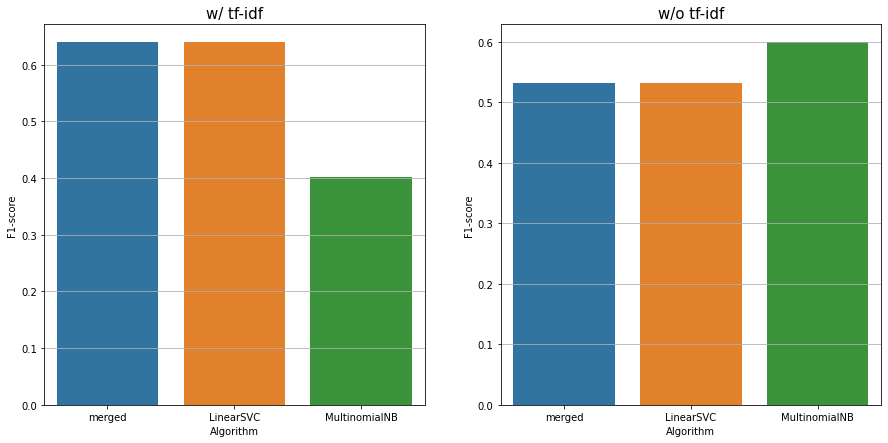

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=score_tfidf)

plt.xlabel('Algorithm', size = 10)
plt.ylabel('F1-score', size = 10)
plt.title('w/ tf-idf', size=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.grid(True, axis='y')


plt.subplot(1,2,2)
plt.xlabel('Algorithm', size = 10)
plt.ylabel('F1-score', size = 10)
plt.title('w/o tf-idf', size=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

sns.barplot(data=score_tfidf_false)
plt.grid(True, axis='y')



## BINARY Classification

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


### AdaBoostClassifier 이용

In [ ]:
clf = AdaBoostClassifier()
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_tfidf, list_personality_bin)
preds = multi_target_classifier.predict(X_tfidf)

preds_t = [translate_back(p) for p in preds]
vec1 = data.type ==  preds_t
for i in range(4):
    print("f1 score for %s:\n%s" % (titles[i],
                                    f1_score(np.array(list_personality_bin)[:,i], preds[:,i])))


f1 score for Extraversion (E) - Introversion (I):
0.6466821885913854
f1 score for Sensation (S) - INtuition (N):
0.5565307176045432
f1 score for Thinking (T) - Feeling (F):
0.8140120967741935
f1 score for Judgement (J) - Perception (P):
0.8449598246895544


### XGBBoostClassifier 이용

In [ ]:
clf = xgb.XGBClassifier()
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_tfidf, list_personality_bin)
preds = multi_target_classifier.predict(X_tfidf)

preds_t = [translate_back(p) for p in preds]
vec1 = data.type ==  preds_t
for i in range(4):
    print("f1 score for %s:\n%s" % (titles[i],
                                    f1_score(np.array(list_personality_bin)[:,i], preds[:,i])))


f1 score for Extraversion (E) - Introversion (I):
0.7090855282627997
f1 score for Sensation (S) - INtuition (N):
0.6359696641386782
f1 score for Thinking (T) - Feeling (F):
0.8670286652355097
f1 score for Judgement (J) - Perception (P):
0.8790176959191044


In [ ]:
X = list_posts
y = np.array(list_personality_bin)

clf = xgb.XGBClassifier()
kf = StratifiedShuffleSplit(n_splits=10)

list_score = []
list_score_per_class= []

for train, test in kf.split(X, y):
    X_train, X_test, y_train, y_test = \
        X[train], X[test], y[train], y[test]

    X_train = cntizer.fit_transform(X_train)
    X_test = cntizer.transform(X_test)
    
    X_train = tfizer.fit_transform(X_train).toarray()
    X_test = tfizer.transform(X_test).toarray()

    multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
    multi_target_classifier.fit(X_train, y_train)
    preds = multi_target_classifier.predict(X_test)
    
    rev_preds = np.array([translate_back(p) for p in preds]) 
    rev_test = np.array([translate_back(p) for p in y_test])
    score = f1_score(rev_test,rev_preds, average='weighted')
    list_score.append(score)
    print('\nTotal score: %s' % f1_score(rev_test,rev_preds, average='weighted'))

    list_temp =[]
    for i in range(4):
        score_per_class = f1_score(y_test[:,i], preds[:,i])
        list_temp.append(score_per_class)
        print(score_per_class)
    list_score_per_class.append(list_temp)



Total score: 0.5715267402428946
0.5987654320987654
0.49425287356321834
0.8287841191066998
0.8443649373881933

Total score: 0.5709729064259178
0.6504559270516717
0.4772727272727271
0.8215661103979461
0.8394618834080718

Total score: 0.5863035356267813
0.6086956521739131
0.5054945054945055
0.8106734434561627
0.8538116591928251

Total score: 0.5954863191663737
0.6292834890965732
0.546448087431694
0.8066581306017926
0.8506787330316743

Total score: 0.5696791319333686
0.6051873198847262
0.5082872928176796
0.8125
0.8535262206148283

Total score: 0.5547288956143284
0.592814371257485
0.5729729729729729
0.8101910828025477
0.8336347197106692

Total score: 0.6004086456470715
0.6565349544072948
0.5287356321839081
0.8071065989847717
0.8720292504570383

Total score: 0.5687374843402828
0.6312684365781711
0.48520710059171607
0.8180677540777916
0.8446005267778753

Total score: 0.5673711435259227
0.6107784431137725
0.47058823529411764
0.8051612903225805
0.8548387096774194

Total score: 0.56252359639943

여기도 16class classification과 마찬가지로 k-fold Cross validation에서 k=10으로 설정했기 때문에 총 10개의 결과가 나오는 것이다. 각 결과에 대해서 4줄씩은 (E, I), (S, N), (T, F). (J, P)에 대한 결과값이다.

total score라는 것은 binary classification인데 한 개의 mbti에 대해서 (E, I), (S, N), (T, F). (J, P)를 한꺼번에 예측한 f1 score 값이다.

### AdaBoost

In [ ]:
list_score_per_class = np.array(list_score_per_class)
print('Mean score per classes: %s' % np.around(list_score_per_class.mean(axis=0),2))

Mean score per classes: [0.62 0.51 0.81 0.85]


### XGBoost

In [ ]:
list_score_per_class = np.array(list_score_per_class)
print('Mean score per classes: %s' % np.around(list_score_per_class.mean(axis=0), 2))

Mean score per classes: [0.62 0.51 0.81 0.85]


### AdaBoostClassifier를 사용했을 때  


|Attribute| Extraversion (E) - Introversion (I)  | Sensation (S) - INtuition (N)  | Thinking (T) - Feeling (F)  | Judgement (J) - Perception (P)  |   
|:-:|---|---|---|---|
|F1-Score|0.61 | 0.51 | 0.8 |  0.83|    


### XGBoostClassifier를 사용했을 때  


|Attribute| Extraversion (E) - Introversion (I)  | Sensation (S) - INtuition (N)  | Thinking (T) - Feeling (F)  | Judgement (J) - Perception (P)  |   
|:-:|---|---|---|---|
|F1-Score|0.65 | 0.56 | 0.83 |  0.84| 